In [12]:
# load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
from lifelines import KaplanMeierFitter

In [16]:
from lifelines import CoxPHFitter

In [17]:
data=pd.read_csv('/content/lung.csv',)

In [18]:
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [19]:
data.shape

(228, 11)

In [20]:
# in servival analaysis censored are of different type
# right ,left ,interval censored 
# in this we ae using right censored data 
# after observation or the start of the observation may be the persons may be droped down
# by somhow the person may be dropped down 

# Variable description
# inst: Institution code
# time: Survival time in days
# status: censoring status 0 = censored, 1 = dead
# age: Age in years
# sex: Male = 0 Female = 1
# ph.ecog: ECOG performance score as rated by the physician. 0 = asymptomatic, 1 = symptomatic but completely ambulatory, 2 = in bed <50% of the day, 3 = in bed > 50% of the day but not bedbound, 4 = bedbound
# ph.karno: Karnofsky performance score (bad=0-good=100) rated by physician
# pat.karno: Karnofsky performance score as rated by patient
# meal.cal = Calories consumed at meals
# wt.loss = Weight loss in last six months

In [21]:
data = data[['time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno','pat.karno', 'meal.cal', 'wt.loss']]
data["status"] = data["status"] - 1
data["sex"] = data["sex"] - 1
data.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,306,1,74,0,1.0,90.0,100.0,1175.0,NaN
1,455,1,68,0,0.0,90.0,90.0,1225.0,15.0
2,1010,0,56,0,0.0,90.0,90.0,NaN,15.0
3,210,1,57,0,1.0,90.0,60.0,1150.0,11.0
4,883,1,60,0,0.0,100.0,90.0,NaN,0.0
5,1022,0,74,0,1.0,50.0,80.0,513.0,0.0
6,310,1,68,1,2.0,70.0,60.0,384.0,10.0
7,361,1,71,1,2.0,60.0,80.0,538.0,1.0
8,218,1,53,0,1.0,70.0,80.0,825.0,16.0
9,166,1,61,0,2.0,70.0,70.0,271.0,34.0


In [22]:
data.dtypes 

time           int64
status         int64
age            int64
sex            int64
ph.ecog      float64
ph.karno     float64
pat.karno    float64
meal.cal     float64
wt.loss      float64
dtype: object

In [23]:
data.isnull().sum() # for missing values

time          0
status        0
age           0
sex           0
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
dtype: int64

In [24]:
data.columns

Index(['time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno', 'pat.karno',
       'meal.cal', 'wt.loss'],
      dtype='object')

In [25]:
# we repace the null value with mean value 

data["ph.karno"].fillna(data["ph.karno"].mean(), inplace = True)
data["pat.karno"].fillna(data["pat.karno"].mean(), inplace = True)
data["meal.cal"].fillna(data["meal.cal"].mean(), inplace = True)
data["wt.loss"].fillna(data["wt.loss"].mean(), inplace = True)
data.dropna(inplace=True)
data["ph.ecog"] = data["ph.ecog"].astype("int64")

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [26]:
data.isnull().sum()

time         0
status       0
age          0
sex          0
ph.ecog      0
ph.karno     0
pat.karno    0
meal.cal     0
wt.loss      0
dtype: int64

In [27]:
data.shape

(227, 9)

In [28]:
# it is used in medical field and transporation and various fields
# used for identifing after diagonis of cancer,afterhoe many days or year  a person dies
# what is the probability that after how many year a  person died or problility that after two year how many person died
# for product based ike amazon company they can predict the perchage probabilty
# for tesla what is the probability that a battery died after 2 or 3 years
# we used three model
# non perametric model
# semi parametric model
# parametric model


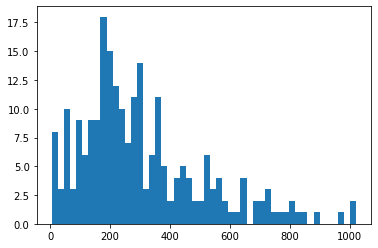

In [29]:
# before going through different model first we shape the columns
T = data['time']
E = data['status']
plt.hist(T,bins = 50)
plt.show()
# log normal distribution - tail towards right


## Fitting a non parametric model [Kaplan Meier Curve]

Text(0, 0.5, 'probability of servival')

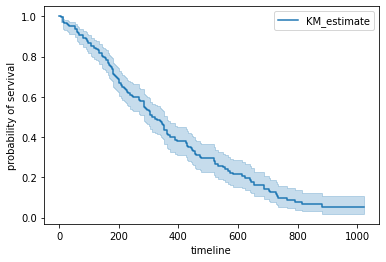

In [30]:
kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot_survival_function()
plt.ylabel('probability of servival')

Text(0, 0.5, 'probability of servival')

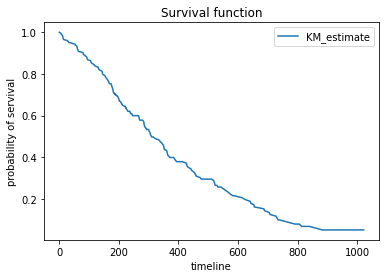

In [31]:
# without confidence interval
kmf.survival_function_.plot()
plt.title('Survival function')
plt.ylabel('probability of servival')

Text(0, 0.5, 'probability of died')

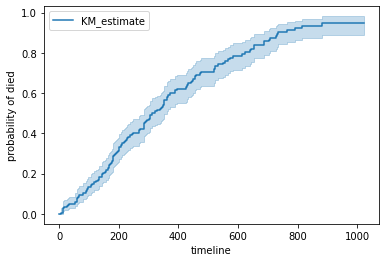

In [32]:
# it is 1-servival analysis
kmf.plot_cumulative_density()
plt.ylabel('probability of died')

In [33]:
 # median servival time( 50 % servival days)
 kmf.median_survival_time_

310.0

In [34]:
from lifelines.utils import median_survival_times

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

310.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                   284.0                   361.0


Text(0.5, 1.0, 'Survival of different gender group')

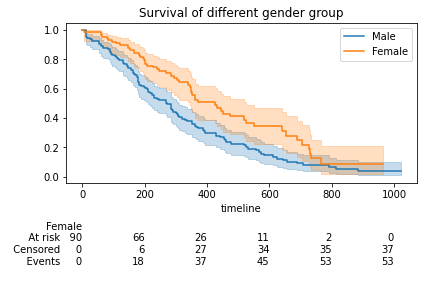

In [35]:
# in kmf ,we can plot the servivalfunction but we can not observe theimpact of the different predictor
# we can have some catergorical data and based on subset of the data , we can plot different curves and compare them.
# kmf have some limitation like it gives step function like the function is not smooth
#probability remains constant given duration of time which is not also practial or realistic
#if we also want to compare the groups we can also segrating or by using subset of the data based on the particular group
# we want the plot male and female group seperately
ax = plt.subplot(111)

m = (data["sex"] == 0)

kmf.fit(durations = T[m], event_observed = E[m], label = "Male")
kmf.plot_survival_function(ax = ax,)

kmf.fit(T[~m], event_observed = E[~m], label = "Female")
kmf.plot_survival_function(ax = ax,at_risk_counts = True)

plt.title("Survival of different gender group")

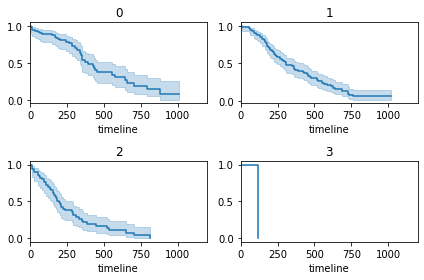

In [36]:
#to automate the process we can use for loop,number of categories are more then we can use for loop
ecog_types = data.sort_values(by = ['ph.ecog'])["ph.ecog"].unique()

for i, ecog_types in enumerate(ecog_types):
    ax = plt.subplot(2, 2, i + 1)
    ix = data['ph.ecog'] == ecog_types
    kmf.fit(T[ix], E[ix], label = ecog_types)
    kmf.plot_survival_function(ax = ax, legend = False)
    plt.title(ecog_types)
    plt.xlim(0, 1200)

plt.tight_layout()

In [37]:
data['ph.ecog'].value_counts()

# 3rd label has only one observation so dropout that observation

1    113
0     63
2     50
3      1
Name: ph.ecog, dtype: int64

In [38]:
data['status'].value_counts()

1    164
0     63
Name: status, dtype: int64

In [39]:
data = data[data["ph.ecog"] != 3]
data.shape

(226, 9)

In [40]:
data['ph.ecog'].value_counts()

1    113
0     63
2     50
Name: ph.ecog, dtype: int64

## Fiiting Cox Proportional Hazard Model



In [41]:
# it is a semiperametric type of model because even if the regression parameters (the betas) are known, the distribution of the outcome remains unknown.
# Cox proportional hazards regression model assumptions includes:

#ndependence of survival times between distinct individuals in the sample,
#A multiplicative relationship between the predictors and the hazard, and
#A constant hazard ratio over time. This assumption implies that, the hazard curves for the groups should be proportional and cannot cross.


## Hazard and Hazard Ratio
#Hazard is defined as the slope of the survival curve — a measure of how rapidly subjects are dying.
#The hazard ratio compares two treatments. If the hazard ratio is 2.0, then the rate of deaths in one treatment group is twice the rate in the other group.##

In [42]:
data.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,306,1,74,0,1,90.0,100.0,1175.000000,9.831776
1,455,1,68,0,0,90.0,90.0,1225.000000,15.000000
2,1010,0,56,0,0,90.0,90.0,928.779006,15.000000
3,210,1,57,0,1,90.0,60.0,1150.000000,11.000000
4,883,1,60,0,0,100.0,90.0,928.779006,0.000000


In [43]:
# sex and ph.ecog are categorical column but for modeling purpose if we have more than 2 category we usually dummy and stored the variables foR ANALYSIS PURPOSE
dummies_ecog = pd.get_dummies(data["ph.ecog"],
                         prefix = 'ecog')
dummies_ecog.head(4)  
# ECOG 0 IS A BASE CATEGORY WE CAN REMOVE THAT AND COMPARE ECOG 1 AND ECOG 2

,ecog_0,ecog_1,ecog_2
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0


In [44]:
# after dummy coading we select ecog 1 and ecog 2 then concatenate with orignal data set with axis 1
dummies_ecog = dummies_ecog[["ecog_1", "ecog_2"]]
data = pd.concat([data, dummies_ecog], 
                  axis = 1)
data.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,ecog_1,ecog_2
0,306,1,74,0,1,90.0,100.0,1175.000000,9.831776,1,0
1,455,1,68,0,0,90.0,90.0,1225.000000,15.000000,0,0
2,1010,0,56,0,0,90.0,90.0,928.779006,15.000000,0,0
3,210,1,57,0,1,90.0,60.0,1150.000000,11.000000,1,0
4,883,1,60,0,0,100.0,90.0,928.779006,0.000000,0,0


In [45]:
# drop the ph.ecog
data = data.drop("ph.ecog", axis = 1)
data.head()


,time,status,age,sex,ph.karno,pat.karno,meal.cal,wt.loss,ecog_1,ecog_2
0,306,1,74,0,90.0,100.0,1175.000000,9.831776,1,0
1,455,1,68,0,90.0,90.0,1225.000000,15.000000,0,0
2,1010,0,56,0,90.0,90.0,928.779006,15.000000,0,0
3,210,1,57,0,90.0,60.0,1150.000000,11.000000,1,0
4,883,1,60,0,100.0,90.0,928.779006,0.000000,0,0


In [46]:
# now we have the data set that we can use for Cox proportional 
cph = CoxPHFitter()
cph.fit(data, duration_col = 'time', event_col = 'status')

cph.print_summary() 
# exponential of cooficient(exp(coef)) are known as hazard ratio

<lifelines.CoxPHFitter: fitted with 226 total observations, 63 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 226
number of events observed = 163
   partial log-likelihood = -721.02
         time fit was run = 2022-05-29 08:15:48 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.58       0.56       0.17            -0.92            -0.25                 0.40                 0.78
ph.karno    0.02       1.02       0.01            -0.00             0.03                 1.00                 1.03
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.02             0.00                 0.98                 1.00
ecog_1      0.62       1.86       0.24             0.15             1.09                 1.17                 2.97
ecog_2      1.20       3.31       0.37             0.46             1.93                 1.59                 6.89

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  1.33   0.18       2.44
sex           0.00 -3.41 <0.005      10.58
ph.karno      0.00  1.64   0.10       3.29
pat.karno     0.00 -1.77   0.08       3.70
meal.cal      0.00  0.06   0.95       0.07
wt.loss       0.00 -1.73   0.08       3.57
ecog_1        0.00  2.60   0.01       6.76
ecog_2        0.00  3.19 <0.005       9.46
---
Concordance = 0.65
Partial AIC = 1458.05
log-likelihood ratio test = 36.08 on 8 df
-log2(p) of ll-ratio test = 15.85

# Interpretation
#Wt.loss has a coefficient of about -0.01.

#We can recall that in the Cox proportional hazard model, a higher hazard means more at risk of the event occurring. The value exp(-0.01)  is called the hazard ratio.

#Here, a one unit increase in wt loss means the baseline hazard will increase by a factor of exp(-0.01)= 0.99 -> about a 1% decrease.

#Similarly, the values in the ecog column are: [0 = asymptomatic, 1 = symptomatic but completely ambulatory, 2 = in bed < 50 percentage of the day]. The value of the coefficient associated with ecog2,exp(1.20) , is the value of ratio of hazards associated with being "in bed  < 50% of the day (coded as 2)" compared to asymptomatic (coded as 0, base category).

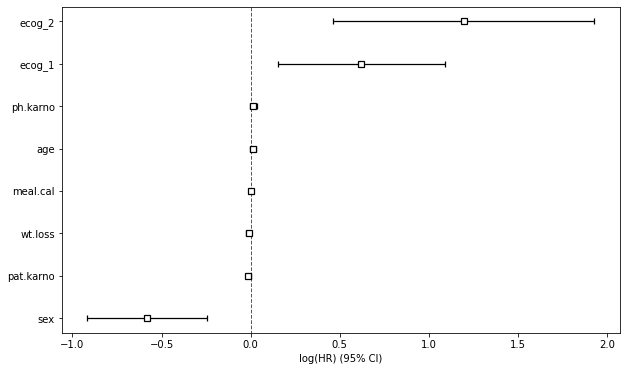

In [47]:
plt.subplots(figsize=(10, 6))
cph.plot()
# PLOTTING THE DIFFERENT COEEFIENT IN TERMS OF LOG HAZARD

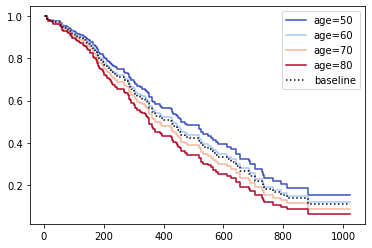

In [48]:
# plot the servival function for different covarient for ex. for diff age value
cph.plot_partial_effects_on_outcome(covariates = 'age',
                                    values = [50, 60, 70, 80],
                                    cmap = 'coolwarm')



In [49]:
# Once we feed the cox proportional hazard model we need to check proportional hazard assumption 
cph.check_assumptions(data, p_value_threshold = 0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



/usr/local/lib/python3.7/dist-packages/lifelines/fitters/mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 226 total observations, 63 right-censored observations>
         test_name = proportional_hazard_test

---
                test_statistic    p  -log2(p)
age       km              0.42 0.52      0.95
          rank            0.18 0.67      0.58
ecog_1    km              1.57 0.21      2.25
          rank            1.41 0.23      2.09
ecog_2    km              1.20 0.27      1.87
          rank            0.86 0.35      1.50
meal.cal  km              5.32 0.02      5.57
          rank            4.73 0.03      5.08
pat.karno km              0.22 0.64      0.64
          rank            0.17 0.68      0.55
ph.karno  km              3.62 0.06      4.13
          rank            3.07 0.08      3.65
sex       km              2.62 0.11      3.25
          rank            2.50 0.11      3.14
wt.loss   km              0.02 0.89      0.17
          rank            0.06 0.81      0.31



1. Variable 'meal.cal' failed the non-proportional test: p-value is 0.0210.

   Advice 1: the functional form of the variable 'meal.cal' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'meal.cal' using pd.cut, and then specify it in
`strata=['meal.cal', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#

[]

In [50]:
from lifelines.statistics import proportional_hazard_test

results = proportional_hazard_test(cph, data, time_transform='rank')
results.print_summary(decimals=3, model="untransformed variables")

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 226 total observations, 63 right-censored observations>
         test_name = proportional_hazard_test

---
           test_statistic    p  -log2(p)
age                  0.18 0.67      0.58
ecog_1               1.41 0.23      2.09
ecog_2               0.86 0.35      1.50
meal.cal             4.73 0.03      5.08
pat.karno            0.17 0.68      0.55
ph.karno             3.07 0.08      3.65
sex                  2.50 0.11      3.14
wt.loss              0.06 0.81      0.31

In [51]:
# result is not fullfill the cretria for a single variable and a large number of variable then we can go for parametric Model
# in meal.cal p =0.03 that does not satisfy the criteria

Parametric [Accelerated Failure Time Model (AFT)]

In [52]:
from lifelines import WeibullFitter,\
                      ExponentialFitter,\
                      LogNormalFitter,\
                      LogLogisticFitter


# Instantiate each fitter
wb = WeibullFitter()
ex = ExponentialFitter()
log = LogNormalFitter()
loglogis = LogLogisticFitter()

# Fit to data
for model in [wb, ex, log, loglogis]:
  model.fit(durations = data["time"],
            event_observed = data["status"])
  # Print AIC
  print("The AIC value for", model.__class__.__name__, "is", model.AIC_)

  # lower the AIC value better will be the model
  

The AIC value for WeibullFitter is 2286.140229521957
The AIC value for ExponentialFitter is 2301.5875633782243
The AIC value for LogNormalFitter is 2318.111808285761
The AIC value for LogLogisticFitter is 2300.6601651026126


In [53]:
from lifelines import WeibullAFTFitter
weibull_aft = WeibullAFTFitter()
weibull_aft.fit(data, duration_col='time', event_col='status')

weibull_aft.print_summary(3)
# exp(coeff) is accelaration factor sometimes called as time ratio

<lifelines.WeibullAFTFitter: fitted with 226 total observations, 63 right-censored observations>
             duration col = 'time'
                event col = 'status'
   number of observations = 226
number of events observed = 163
           log-likelihood = -1122.980
         time fit was run = 2022-05-29 08:15:50 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                         
lambda_ age       -0.009      0.992      0.007           -0.022            0.005                0.978                1.005
        ecog_1    -0.445      0.641      0.167           -0.773           -0.117                0.462                0.889
        ecog_2    -0.878      0.416      0.263           -1.393           -0.363                0.248                0.695
        meal.cal   0.000      1.000      0.000           -0.000            0.000                1.000                1.000
        pat.karno  0.009      1.009      0.005           -0.001            0.019                0.999                1.019
        ph.karno  -0.012      0.988      0.007           -0.025            0.001                0.975                1.001
        sex        0.416      1.516      0.123            0.175            0.657                1.192                1.928
        wt.loss    0.008      1.008      0.005           -0.001            0.017                0.999                1.017
        Intercept  7.003   1100.221      0.887            5.266            8.741              193.552             6254.062
rho_    Intercept  0.338      1.402      0.062            0.216            0.460                1.241                1.584

                    cmp to      z       p   -log2(p)
param   covariate                                   
lambda_ age          0.000 -1.259   0.208      2.266
        ecog_1       0.000 -2.662   0.008      7.010
        ecog_2       0.000 -3.344   0.001     10.242
        meal.cal     0.000  0.021   0.983      0.024
        pat.karno    0.000  1.787   0.074      3.757
        ph.karno     0.000 -1.831   0.067      3.896
        sex          0.000  3.389   0.001     10.476
        wt.loss      0.000  1.713   0.087      3.527
        Intercept    0.000  7.899 <0.0005     48.337
rho_    Intercept    0.000  5.442 <0.0005     24.177
---
Concordance = 0.649
AIC = 2265.960
log-likelihood ratio test = 36.180 on 8 df
-log2(p) of ll-ratio test = 15.907

#Interpretation of the coefficients
#A unit increase in xi means the average/median survival time changes by a factor of exp(bi) .
#Suppose bi was positive, then the factor exp(bi) is greater than 1, which will decelerate the event time since we divide time by the factor ⇿ increase mean/median survival. Hence, it will be a protective effect.
#Likewise, a negative  bi will hasten the event time ⇿ reduce the mean/median survival time.
#This interpretation is opposite of how the sign influences event times in the Cox model!


In [54]:
#Example
# Sex, which contains [0: Male and 1: Female], has a positive coefficient.
# This means being a female subject compared to male changes mean/median survival time by exp(0.416) = 1.516, approximately a 52% increase in mean/median survival time.

In [55]:
print(weibull_aft.median_survival_time_)
print(weibull_aft.mean_survival_time_)

419.0974649565126
495.96975466421424


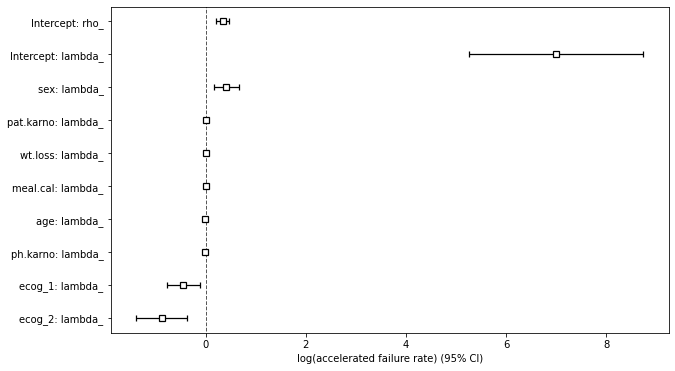

In [56]:
# plot the coefficent with log of accelerated failure rate
plt.subplots(figsize=(10, 6))
weibull_aft.plot()

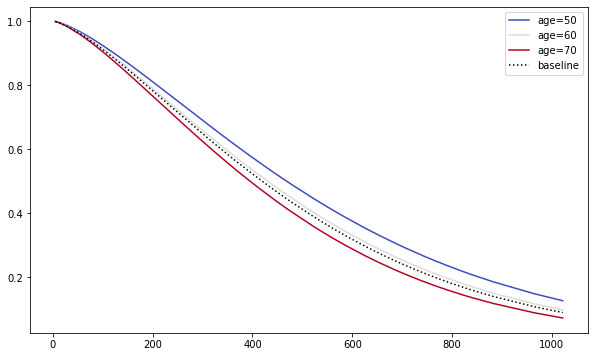

In [57]:
plt.subplots(figsize=(10, 6))
weibull_aft.plot_partial_effects_on_outcome('age', range(50, 80, 10), cmap='coolwarm')


In [58]:
# it is very smooth because we know the distribution and the distribution is weibull